In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
res1=pd.read_csv("Results_Linear.csv")
res1["Ver"]="Linear"
res2=pd.read_csv("Results_Non_Linear.csv")
res2["Ver"]="NoLinear"
res=pd.concat([res1,res2],axis=0)

In [3]:
res1[res1["Best"]].sort_values(by="TE_RMSE").head(5)

,Model,Features,PCA,PCs,HP,TR_MAE,TR_RMSE,TR_R2,TR_Spearman,VA_MAE,...,TE_MAE,TE_RMSE,TE_R2,TE_Spearman,n_train,n_val,n_test,split,Best,Ver
270,HUBER,k3_,True,256,"{'alpha': 0.001, 'epsilon': 1.8}",20.207012,26.295880,0.790002,0.895818,21.580093,...,21.777873,27.993590,0.751058,0.872137,3168,1056,1057,random strat=phase27,True,Linear
54,HUBER,k3_,True,256,"{'alpha': 0.001, 'epsilon': 1.8}",20.095620,26.082816,0.788986,0.892505,21.667675,...,21.703879,28.099772,0.750913,0.878962,3168,1056,1057,random strat=None,True,Linear
126,HUBER,k3_,True,256,"{'alpha': 0.001, 'epsilon': 1.8}",20.252763,26.283136,0.783760,0.893595,21.659513,...,21.616014,28.122627,0.763020,0.875887,3168,1056,1057,random strat=y_quantiles,True,Linear
278,RIDGE,k3_,True,256,{'alpha': 0.3},20.416331,26.197400,0.791572,0.894079,21.707706,...,21.972078,28.166025,0.747982,0.869563,3168,1056,1057,random strat=phase27,True,Linear
62,RIDGE,k3_,True,256,{'alpha': 10.0},20.240557,26.021236,0.789981,0.891302,21.790222,...,21.888574,28.172329,0.749625,0.876396,3168,1056,1057,random strat=None,True,Linear


In [4]:
res2[res2["Best"]].sort_values(by="TE_RMSE").head(5)

,Model,Features,PCA,PCs,HP,TR_MAE,TR_RMSE,TR_R2,TR_Spearman,VA_MAE,...,TE_MAE,TE_RMSE,TE_R2,TE_Spearman,n_train,n_val,n_test,split,Best,Ver
21,GBR,k3_+k4_,True,64,"{'n_estimators': 800, 'learning_rate': 0.05, '...",13.528420,18.207874,0.897170,0.944551,21.177968,...,19.805738,25.958386,0.787431,0.886589,3168,1056,1057,random strat=None,True,NoLinear
54,GBR,k3_,True,256,"{'n_estimators': 600, 'learning_rate': 0.05, '...",11.655371,16.011107,0.920486,0.959923,21.448823,...,20.373964,26.044823,0.786013,0.886459,3168,1056,1057,random strat=None,True,NoLinear
18,GBR,k3_,True,64,"{'n_estimators': 800, 'learning_rate': 0.05, '...",12.421144,16.811611,0.912336,0.952886,21.493080,...,20.267679,26.214629,0.783213,0.881744,3168,1056,1057,random strat=None,True,NoLinear
39,GBR,k3_+k4_,True,128,"{'n_estimators': 800, 'learning_rate': 0.05, '...",12.756405,17.349793,0.906634,0.950491,21.273707,...,20.028313,26.223545,0.783066,0.883560,3168,1056,1057,random strat=None,True,NoLinear
57,GBR,k3_+k4_,True,256,"{'n_estimators': 600, 'learning_rate': 0.1, 'm...",14.123677,18.870304,0.889552,0.942247,21.547221,...,20.162621,26.338578,0.781159,0.885963,3168,1056,1057,random strat=None,True,NoLinear


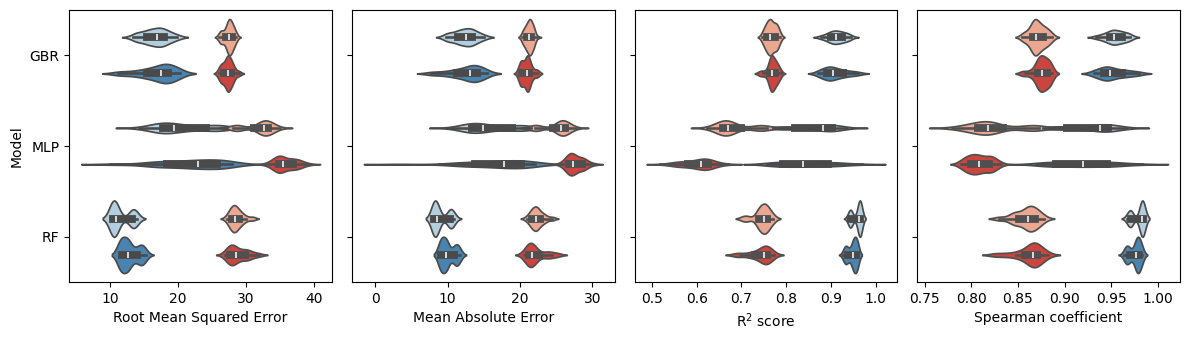

In [5]:
fig,ax=plt.subplots(1,4,figsize=(12,3.5),sharey=True,)
sns.violinplot(data=res2,y="Model",x="TR_RMSE",hue="Features",palette="Blues",ax=ax[0],legend=False)
sns.violinplot(data=res2,y="Model",x="TE_RMSE",hue="Features",palette="Reds",ax=ax[0],legend=False)
ax[0].set(xlabel="Root Mean Squared Error")

sns.violinplot(data=res2,y="Model",x="TR_R2",hue="Features",palette="Blues",ax=ax[2],legend=False)
sns.violinplot(data=res2,y="Model",x="TE_R2",hue="Features",palette="Reds",ax=ax[2],legend=False)
ax[2].set(xlabel="R$^2$ score")

sns.violinplot(data=res2,y="Model",x="TR_MAE",hue="Features",palette="Blues",ax=ax[1],legend=False)
sns.violinplot(data=res2,y="Model",x="TE_MAE",hue="Features",palette="Reds",ax=ax[1],legend=False)
ax[1].set(xlabel="Mean Absolute Error")

sns.violinplot(data=res2,y="Model",x="TR_Spearman",hue="Features",palette="Blues",ax=ax[3],legend=False)
sns.violinplot(data=res2,y="Model",x="TE_Spearman",hue="Features",palette="Reds",ax=ax[3],legend=False)
ax[3].set(xlabel="Spearman coefficient")


plt.tight_layout()
plt.savefig("violin1.png",dpi=300, bbox_inches='tight')
plt.show()

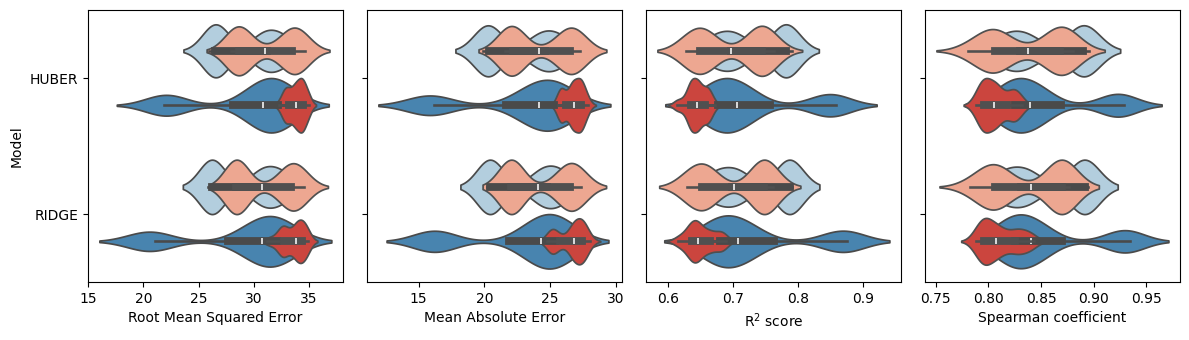

In [6]:
fig,ax=plt.subplots(1,4,figsize=(12,3.5),sharey=True,)
sns.violinplot(data=res1,y="Model",x="TR_RMSE",hue="Features",palette="Blues",ax=ax[0],legend=False)
sns.violinplot(data=res1,y="Model",x="TE_RMSE",hue="Features",palette="Reds",ax=ax[0],legend=False)
ax[0].set(xlabel="Root Mean Squared Error")

sns.violinplot(data=res1,y="Model",x="TR_R2",hue="Features",palette="Blues",ax=ax[2],legend=False)
sns.violinplot(data=res1,y="Model",x="TE_R2",hue="Features",palette="Reds",ax=ax[2],legend=False)
ax[2].set(xlabel="R$^2$ score")

sns.violinplot(data=res1,y="Model",x="TR_MAE",hue="Features",palette="Blues",ax=ax[1],legend=False)
sns.violinplot(data=res1,y="Model",x="TE_MAE",hue="Features",palette="Reds",ax=ax[1],legend=False)
ax[1].set(xlabel="Mean Absolute Error")

sns.violinplot(data=res1,y="Model",x="TR_Spearman",hue="Features",palette="Blues",ax=ax[3],legend=False)
sns.violinplot(data=res1,y="Model",x="TE_Spearman",hue="Features",palette="Reds",ax=ax[3],legend=False)
ax[3].set(xlabel="Spearman coefficient")

plt.tight_layout()
plt.savefig("violin2.png",dpi=300, bbox_inches='tight')
plt.show()

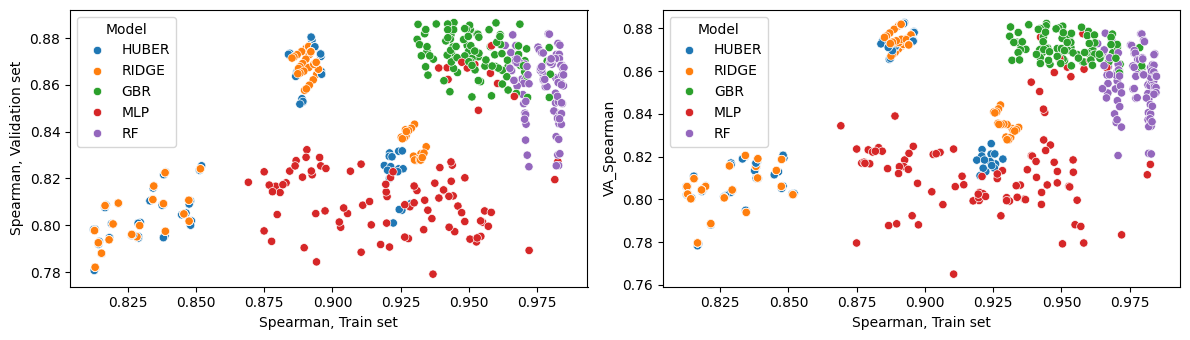

In [7]:
fig,ax=plt.subplots(1,2,figsize=(12,3.5),sharey=False,)
sns.scatterplot(x="TR_Spearman", y="TE_Spearman", data=res, hue="Model", ax=ax[0])
ax[0].set_xlabel("Spearman, Train set");ax[0].set_ylabel("Spearman, Test set")
sns.scatterplot(x="TR_Spearman", y="VA_Spearman", data=res, hue="Model", ax=ax[1])
ax[1].set_xlabel("Spearman, Train set");ax[0].set_ylabel("Spearman, Validation set")
plt.tight_layout()
plt.savefig("scatter1.png",dpi=300, bbox_inches='tight')
plt.show()

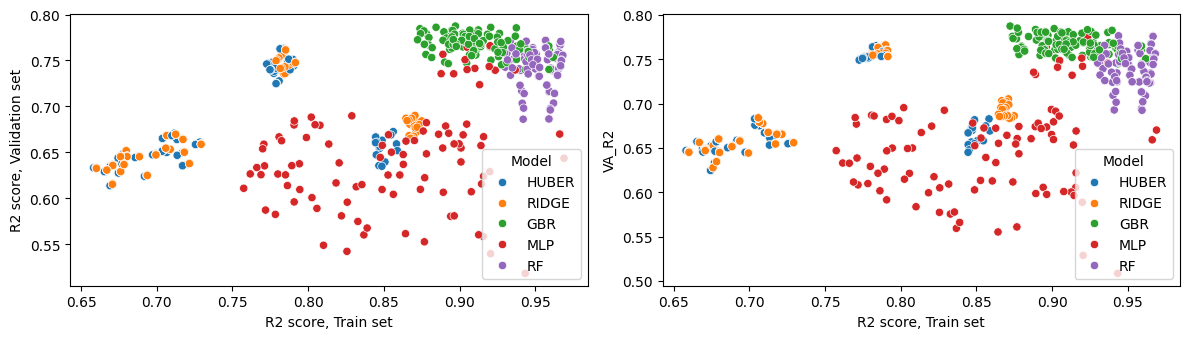

In [8]:
fig,ax=plt.subplots(1,2,figsize=(12,3.5),sharey=False,)
sns.scatterplot(x="TR_R2", y="TE_R2", data=res, hue="Model", ax=ax[0])
ax[0].set_xlabel("R2 score, Train set");ax[0].set_ylabel("R2 score, Test set")
sns.scatterplot(x="TR_R2", y="VA_R2", data=res, hue="Model", ax=ax[1])
ax[1].set_xlabel("R2 score, Train set");ax[0].set_ylabel("R2 score, Validation set")
plt.tight_layout()
plt.savefig("scatter2.png",dpi=300, bbox_inches='tight')
plt.show()

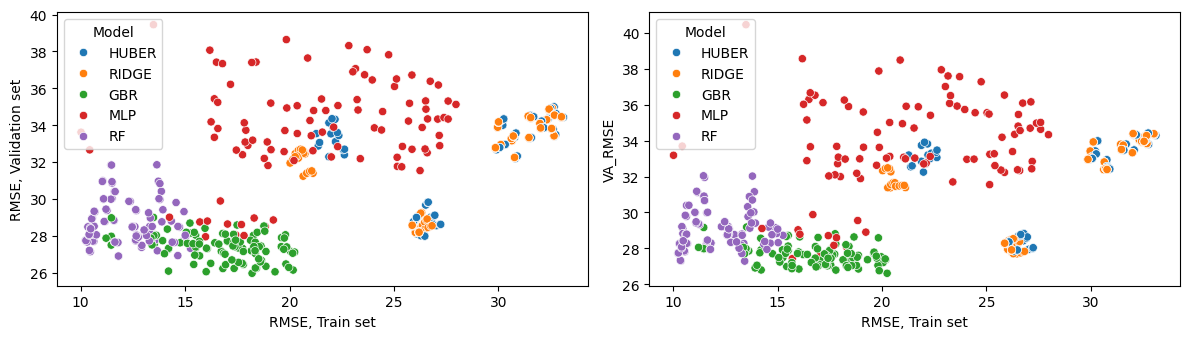

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,3.5),sharey=False,)
sns.scatterplot(x="TR_RMSE", y="TE_RMSE", data=res, hue="Model", ax=ax[0])
ax[0].set_xlabel("RMSE, Train set");ax[0].set_ylabel("RMSE, Test set")
sns.scatterplot(x="TR_RMSE", y="VA_RMSE", data=res, hue="Model", ax=ax[1])
ax[1].set_xlabel("RMSE, Train set");ax[0].set_ylabel("RMSE, Validation set")
plt.tight_layout()
plt.show()

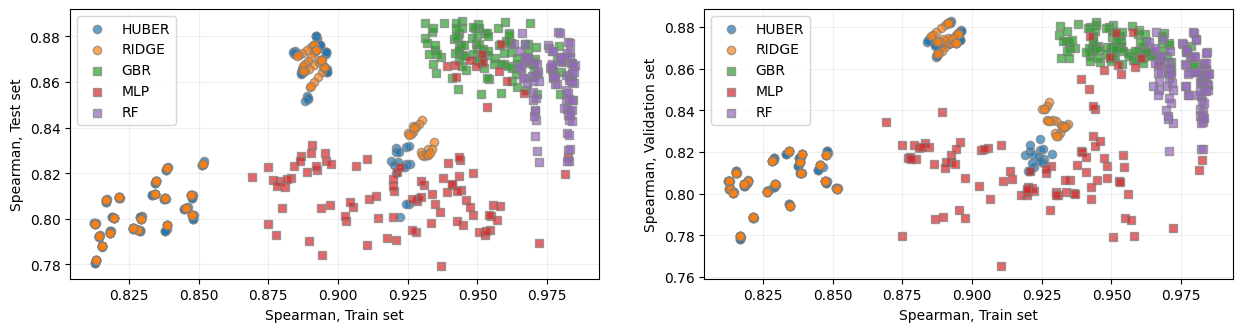

In [10]:
plt.figure(figsize=(15,3.5))
plt.subplot(121)
plt.scatter(res1[res1["Model"]=="HUBER"]["TR_Spearman"],res1[res1["Model"]=="HUBER"]["TE_Spearman"],
            label="HUBER",marker="o",alpha=0.7,edgecolors='gray')
plt.scatter(res1[res1["Model"]=="RIDGE"]["TR_Spearman"],res1[res1["Model"]=="RIDGE"]["TE_Spearman"],
            label="RIDGE",marker="o",alpha=0.7,edgecolors='gray')
plt.scatter(res2[res2["Model"]=="GBR"]["TR_Spearman"],res2[res2["Model"]=="GBR"]["TE_Spearman"],
            label="GBR",marker="s",alpha=0.7,edgecolors='gray')
plt.scatter(res2[res2["Model"]=="MLP"]["TR_Spearman"],res2[res2["Model"]=="MLP"]["TE_Spearman"],
            label="MLP",marker="s",alpha=0.7,edgecolors='gray')
plt.scatter(res2[res2["Model"]=="RF"]["TR_Spearman"],res2[res2["Model"]=="RF"]["TE_Spearman"],
            label="RF",marker="s",alpha=0.7,edgecolors='gray')
plt.legend(ncol=1,loc=2);plt.xlabel("Spearman, Train set");plt.ylabel("Spearman, Test set"); plt.grid(alpha=0.2)
plt.subplot(122)
plt.scatter(res1[res1["Model"]=="HUBER"]["TR_Spearman"],res1[res1["Model"]=="HUBER"]["VA_Spearman"],
            label="HUBER",marker="o",alpha=0.7,edgecolors='gray')
plt.scatter(res1[res1["Model"]=="RIDGE"]["TR_Spearman"],res1[res1["Model"]=="RIDGE"]["VA_Spearman"],
            label="RIDGE",marker="o",alpha=0.7,edgecolors='gray')
plt.scatter(res2[res2["Model"]=="GBR"]["TR_Spearman"],res2[res2["Model"]=="GBR"]["VA_Spearman"],
            label="GBR",marker="s",alpha=0.7,edgecolors='gray')
plt.scatter(res2[res2["Model"]=="MLP"]["TR_Spearman"],res2[res2["Model"]=="MLP"]["VA_Spearman"],
            label="MLP",marker="s",alpha=0.7,edgecolors='gray')
plt.scatter(res2[res2["Model"]=="RF"]["TR_Spearman"],res2[res2["Model"]=="RF"]["VA_Spearman"],
            label="RF",marker="s",alpha=0.7,edgecolors='gray')
plt.legend(ncol=1,loc=2);plt.xlabel("Spearman, Train set");plt.ylabel("Spearman, Validation set"); plt.grid(alpha=0.2)
plt.show()

In [11]:
# -------------------------------------------
# Re-play best model from a Results_*.csv
#   - Rebuild pipeline from row (Model, HP, Features, PCA/PCs)
#   - Repeat the same random split
#   - Export y_true / y_pred for train/val/test
#   - Plot "actual vs. predicted" (test)
# -------------------------------------------
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr

# ---- si no las tienes a mano, define estos helpers mínimos:
def make_feature_matrix(df: pd.DataFrame, prefixes=("k3_", "k4_")):
    cols = [c for c in df.columns if any(c.startswith(p) for p in prefixes)]
    return df[cols].to_numpy(dtype=float), cols

def stratify_labels(df: pd.DataFrame, y: np.ndarray, mode="y_quantiles", q=10):
    if mode == "y_quantiles":
        ranks = pd.qcut(y, q=q, labels=False, duplicates="drop")
        return ranks.astype(int)
    elif mode == "month":
        # requiere columnas Year/Month/Day; ajusta si tu df ya tiene Date
        return df["Month"].to_numpy()
    elif mode == "phase27":
        # ejemplo simple: fase dentro de ventana 27d (si tienes 'DayOfCycle')
        return (df.index.to_series().factorize()[0] % 27)
    else:
        return None

def build_pipeline_from_row(row, use_pca: bool, n_components: int, random_state=0):
    steps = []
    model_name = row["Model"].strip().lower()
    # algunos modelos necesitan/agradecen escalado
    if model_name in ("ridge", "huber", "mlp"):
        steps.append(("sc", StandardScaler(with_mean=False if model_name in ("ridge","huber") else True)))
    if use_pca and n_components and n_components > 0:
        steps.append(("pca", PCA(n_components=int(n_components), whiten=False, svd_solver="full", random_state=random_state)))

    # parsear HP (puede venir como dict-string)
    hp = row["HP"]
    if isinstance(hp, str):
        try:
            hp = ast.literal_eval(hp)
        except Exception:
            hp = {}

    if model_name == "ridge":
        alpha = float(hp.get("alpha", 1.0))
        model = Ridge(alpha=alpha, random_state=random_state)
    elif model_name == "huber":
        alpha = float(hp.get("alpha", 0.001))
        epsilon = float(hp.get("epsilon", 1.35))
        model = HuberRegressor(alpha=alpha, epsilon=epsilon, max_iter=500)
    elif model_name == "gbr":
        n_estimators = int(hp.get("n_estimators", 600))
        learning_rate = float(hp.get("learning_rate", 0.05))
        max_depth = int(hp.get("max_depth", 3))
        loss = hp.get("loss", "huber")
        alpha = float(hp.get("alpha", 0.9))
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate,
                                          max_depth=max_depth, loss=loss, alpha=alpha, random_state=random_state)
    elif model_name == "rf":
        n_estimators = int(hp.get("n_estimators", 600))
        max_depth = None if str(hp.get("max_depth", "None")) == "None" else int(hp.get("max_depth"))
        min_samples_leaf = int(hp.get("min_samples_leaf", 1))
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                      min_samples_leaf=min_samples_leaf, random_state=random_state, n_jobs=-1)
    elif model_name == "mlp":
        hls = tuple(hp.get("hidden_layer_sizes", (128,)))
        alpha = float(hp.get("alpha", 1e-4))
        lri = float(hp.get("learning_rate_init", 1e-3))
        max_iter = int(hp.get("max_iter", 500))
        batch_size = int(hp.get("batch_size", 128))
        model = MLPRegressor(hidden_layer_sizes=hls, alpha=alpha,
                             learning_rate_init=lri, max_iter=max_iter, batch_size=batch_size,
                             early_stopping=True, n_iter_no_change=20, random_state=random_state)
    else:
        raise ValueError(f"Modelo no soportado: {row['Model']}")

    steps.append(("model", model))
    return Pipeline(steps)

def replay_and_export(df: pd.DataFrame,
                      results_csv: str,
                      target_col="Daily total SSN",
                      prefer_metric="TE_Spearman",
                      prefer_ascending=False,
                      stratify_mode="y_quantiles",
                      test_size=0.2, val_size=0.2,
                      random_state=42,
                      out_prefix="bestmodel"):
    # 1) carga resultados y elige fila top
    R = pd.read_csv(results_csv)
    R = R.sort_values(prefer_metric, ascending=prefer_ascending).reset_index(drop=True)
    row = R.iloc[0]

    # 2) reconstruye selección de features
    pref = tuple(p.strip() for p in row["Features"].split("+"))
    use_pca = bool(row["PCA"])
    n_components = int(row.get("PCs", 0))

    # 3) prepara matrices y splits idénticos
    df_sorted = df.sort_index().copy()
    y = df_sorted[target_col].to_numpy(dtype=float)
    X, cols = make_feature_matrix(df_sorted, prefixes=pref)

    strat = stratify_labels(df_sorted, y, mode=stratify_mode) if stratify_mode else None
    idx_all = np.arange(len(df_sorted))
    idx_trv, idx_te = train_test_split(idx_all, test_size=test_size, random_state=random_state,
                                       shuffle=True, stratify=strat)
    strat_trv = strat[idx_trv] if strat is not None else None
    val_rel = val_size / (1.0 - test_size)
    idx_tr, idx_va = train_test_split(idx_trv, test_size=val_rel, random_state=random_state+1,
                                      shuffle=True, stratify=strat_trv)

    Xtr, Xva, Xte = X[idx_tr], X[idx_va], X[idx_te]
    ytr, yva, yte = y[idx_tr], y[idx_va], y[idx_te]

    # 4) pipeline y ajuste
    pipe = build_pipeline_from_row(row, use_pca=use_pca, n_components=n_components, random_state=0)
    pipe.fit(Xtr, ytr)

    # 5) predicciones
    yhat_tr = pipe.predict(Xtr)
    yhat_va = pipe.predict(Xva)
    yhat_te = pipe.predict(Xte)

    # 6) export csvs
    pd.DataFrame({"y_true": ytr, "y_pred": yhat_tr}).to_csv(f"{out_prefix}_train.csv", index=False)
    pd.DataFrame({"y_true": yva, "y_pred": yhat_va}).to_csv(f"{out_prefix}_val.csv", index=False)
    pd.DataFrame({"y_true": yte, "y_pred": yhat_te}).to_csv(f"{out_prefix}_test.csv", index=False)

    # 7) métrica resumen + scatter test
    def metric_pack(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        rho, _ = spearmanr(y_true, y_pred)
        return mae, rmse, r2, rho

    tr = metric_pack(ytr, yhat_tr)
    va = metric_pack(yva, yhat_va)
    te = metric_pack(yte, yhat_te)

    print(f"[Best row] Model={row['Model']} | Features={row['Features']} | PCA={use_pca} PCs={n_components} | HP={row['HP']}")
    print(f"  TR  -> MAE={tr[0]:.2f} RMSE={tr[1]:.2f} R2={tr[2]:.3f} Spearman={tr[3]:.3f}")
    print(f"  VAL -> MAE={va[0]:.2f} RMSE={va[1]:.2f} R2={va[2]:.3f} Spearman={va[3]:.3f}")
    print(f"  TES -> MAE={te[0]:.2f} RMSE={te[1]:.2f} R2={te[2]:.3f} Spearman={te[3]:.3f}")

    # scatter test
    plt.figure(figsize=(4.8,4.8))
    plt.scatter(yte, yhat_te, s=10, alpha=0.5, label="Test set")
    plt.scatter(ytr, yhat_tr, s=10, alpha=0.5, label="Train set")
    plt.scatter(yva, yhat_va, s=10, alpha=0.5, label="Validation set")
    plt.legend()
    lo = 0
    hi = max(yte.max(), yhat_te.max())*1.05
    plt.plot([lo,hi],[lo,hi],'--',lw=1)
    plt.xlim(lo,hi); plt.ylim(lo,hi)
    plt.xlabel("Actual (SSN)"); plt.ylabel("Predicted (SSN)")
    plt.title(f"{row['Model']} • {row['Features']} • PCA={use_pca} (TE)\n"
              f"RMSE={te[1]:.1f}, R2={te[2]:.2f}, ρ={te[3]:.2f}")
    plt.xlim(0,255);plt.ylim(0,255)
    plt.tight_layout()
    plt.savefig(f"{out_prefix}_scatter_test.png", dpi=300, bbox_inches='tight')
    plt.show()

    return pipe, row


In [12]:
df_final=pd.read_csv("k34_allyears.csv")

[Best row] Model=GBR | Features=k3_+k4_ | PCA=True PCs=64 | HP={'n_estimators': 800, 'learning_rate': 0.05, 'max_depth': 3, 'loss': 'huber', 'alpha': 0.9}
  TR  -> MAE=12.20 RMSE=16.51 R2=0.915 Spearman=0.954
  VAL -> MAE=20.86 RMSE=27.25 R2=0.773 Spearman=0.879
  TES -> MAE=20.92 RMSE=27.62 R2=0.771 Spearman=0.877


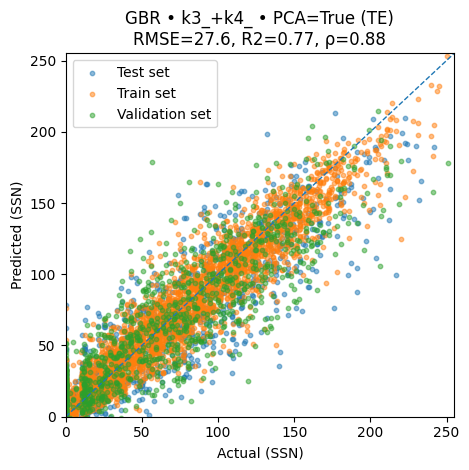

In [13]:
# df_final: dataframe maestro con target y columnas de features (k3_/k4_)
# results_csv: uno de los archivos, p.ej. "Results_Non_Linear.csv" o "Results_Linear.csv"

_ = replay_and_export(df_final,
                      results_csv="Results_Non_Linear.csv",
                      target_col="Daily total SSN",
                      prefer_metric="TE_Spearman",  # o "TE_RMSE" si prefieres
                      prefer_ascending=False,       # False para Spearman (max), True para RMSE (min)
                      stratify_mode="y_quantiles",
                      test_size=0.2, val_size=0.2,
                      random_state=42,
                      out_prefix="bestmodel_ivg_nolinear")
# Esto deja:
# - bestmodel_ivg_train.csv / _val.csv / _test.csv (y_true, y_pred)
# - bestmodel_ivg_scatter_test.png (figure lista para el paper)


[Best row] Model=HUBER | Features=k3_ | PCA=True PCs=256 | HP={'alpha': 0.001, 'epsilon': 1.35}
  TR  -> MAE=20.12 RMSE=26.42 R2=0.781 Spearman=0.894
  VAL -> MAE=21.65 RMSE=27.79 R2=0.764 Spearman=0.874
  TES -> MAE=21.56 RMSE=28.16 R2=0.762 Spearman=0.876


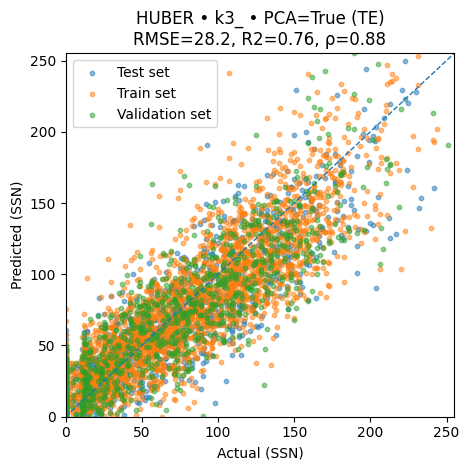

In [14]:
# df_final: dataframe maestro con target y columnas de features (k3_/k4_)
# results_csv: uno de los archivos, p.ej. "Results_Non_Linear.csv" o "Results_Linear.csv"

_ = replay_and_export(df_final,
                      results_csv="Results_Linear.csv",
                      target_col="Daily total SSN",
                      prefer_metric="TE_Spearman",  # o "TE_RMSE" si prefieres
                      prefer_ascending=False,       # False para Spearman (max), True para RMSE (min)
                      stratify_mode="y_quantiles",
                      test_size=0.2, val_size=0.2,
                      random_state=42,
                      out_prefix="bestmodel_ivg_linear")
# Esto deja:
# - bestmodel_ivg_train.csv / _val.csv / _test.csv (y_true, y_pred)
# - bestmodel_ivg_scatter_test.png (figure lista para el paper)


In [15]:
import pandas as pd
from pathlib import Path

linear = pd.read_csv("Results_Linear.csv")
nonlin = pd.read_csv("Results_Non_Linear.csv")
df = pd.concat([linear, nonlin], ignore_index=True)

for c in df.columns:
    if c.startswith(("TR_","VA_","TE_")):
        df[c] = pd.to_numeric(df[c], errors="coerce")

top5 = (df.sort_values("TE_Spearman", ascending=False)
          .head(5)[["Model","Features","PCA","TE_RMSE","TE_R2","TE_Spearman"]])

# Formato corto y redondeos
fmt = top5.copy()
fmt["PCA"] = fmt["PCA"].astype(bool).map({True:"on", False:"off"})
for col in ["TE_RMSE","TE_R2","TE_Spearman"]:
    fmt[col] = fmt[col].map(lambda x: f"{x:.3f}")

tex = fmt.to_latex(index=False, escape=False, column_format="l l c c c c",
                   caption="Top--5 models by test Spearman $\\rho$.",
                   label="tab:leaderboard")

Path("leaderboard.tex").write_text(tex)
print("Saved:", "/mnt/data/leaderboard.tex")


Saved: /mnt/data/leaderboard.tex


In [16]:
tex

'\\begin{table}\n\\caption{Top--5 models by test Spearman $\\rho$.}\n\\label{tab:leaderboard}\n\\begin{tabular}{l l c c c c}\n\\toprule\nModel & Features & PCA & TE_RMSE & TE_R2 & TE_Spearman \\\\\n\\midrule\nGBR & k3_+k4_ & on & 25.958 & 0.787 & 0.887 \\\\\nGBR & k3_ & on & 26.045 & 0.786 & 0.886 \\\\\nGBR & k3_+k4_ & on & 26.039 & 0.786 & 0.886 \\\\\nGBR & k3_+k4_ & on & 26.339 & 0.781 & 0.886 \\\\\nGBR & k3_ & on & 26.078 & 0.785 & 0.886 \\\\\n\\bottomrule\n\\end{tabular}\n\\end{table}\n'